## Codes and data used in the paper: 

"Extracting information from S-curves of language change",
Fakhteh Ghanbarnejad, Martin Gerlach, José M. Miotto, Eduardo G. Altmann
J. R. Soc. Interface 11, 20141044 (2014) 
http://rsif.royalsocietypublishing.org/content/11/101/20141044
http://arxiv.org/abs/1406.4498


In [1]:
import numpy as np
import pylab as pl
import codes as mycodes #requires scipy.optimize

In [2]:
## Choose the data file from data file, check using
#!ls ./data/
filename="VerbsRegularization_en_thrive"

In [3]:
## import the data and create timeseries: t, rho, sigma
x= mycodes.read_data(filename)
t = np.array([int(h.split()[0]) for h in x]) # time
rho = np.array([float(h.split()[1]) for h in x]) # rho
sigma_s = np.array([float(h.split()[2]) for h in x]) # error from finite sampling
sigma_0 = np.sqrt(0.002) # error from external sources
sigma = np.sqrt(sigma_s**2 + sigma_0**2  ) # combine sigma_0 and sigma_s

In [4]:
# fit the mixed model to the timeseries
## initial conditions for parameters in the numerical optimizations
## check different values in case of local minima in the Least-Square-minimization, e.g. setting random initial conditions and making amny runs
theta_0 = [0.5*(t[-1]+t[0]),0.01,0.1,0.1,0.2] 

## fit
[theta,t_fit,rho_fit] = mycodes.fit(t,rho,sigma,theta_0)

## output in "theta"
print("a=",theta[3],"b=",theta[4])

a= 0.007162160010226523 b= 0.07520455816694603


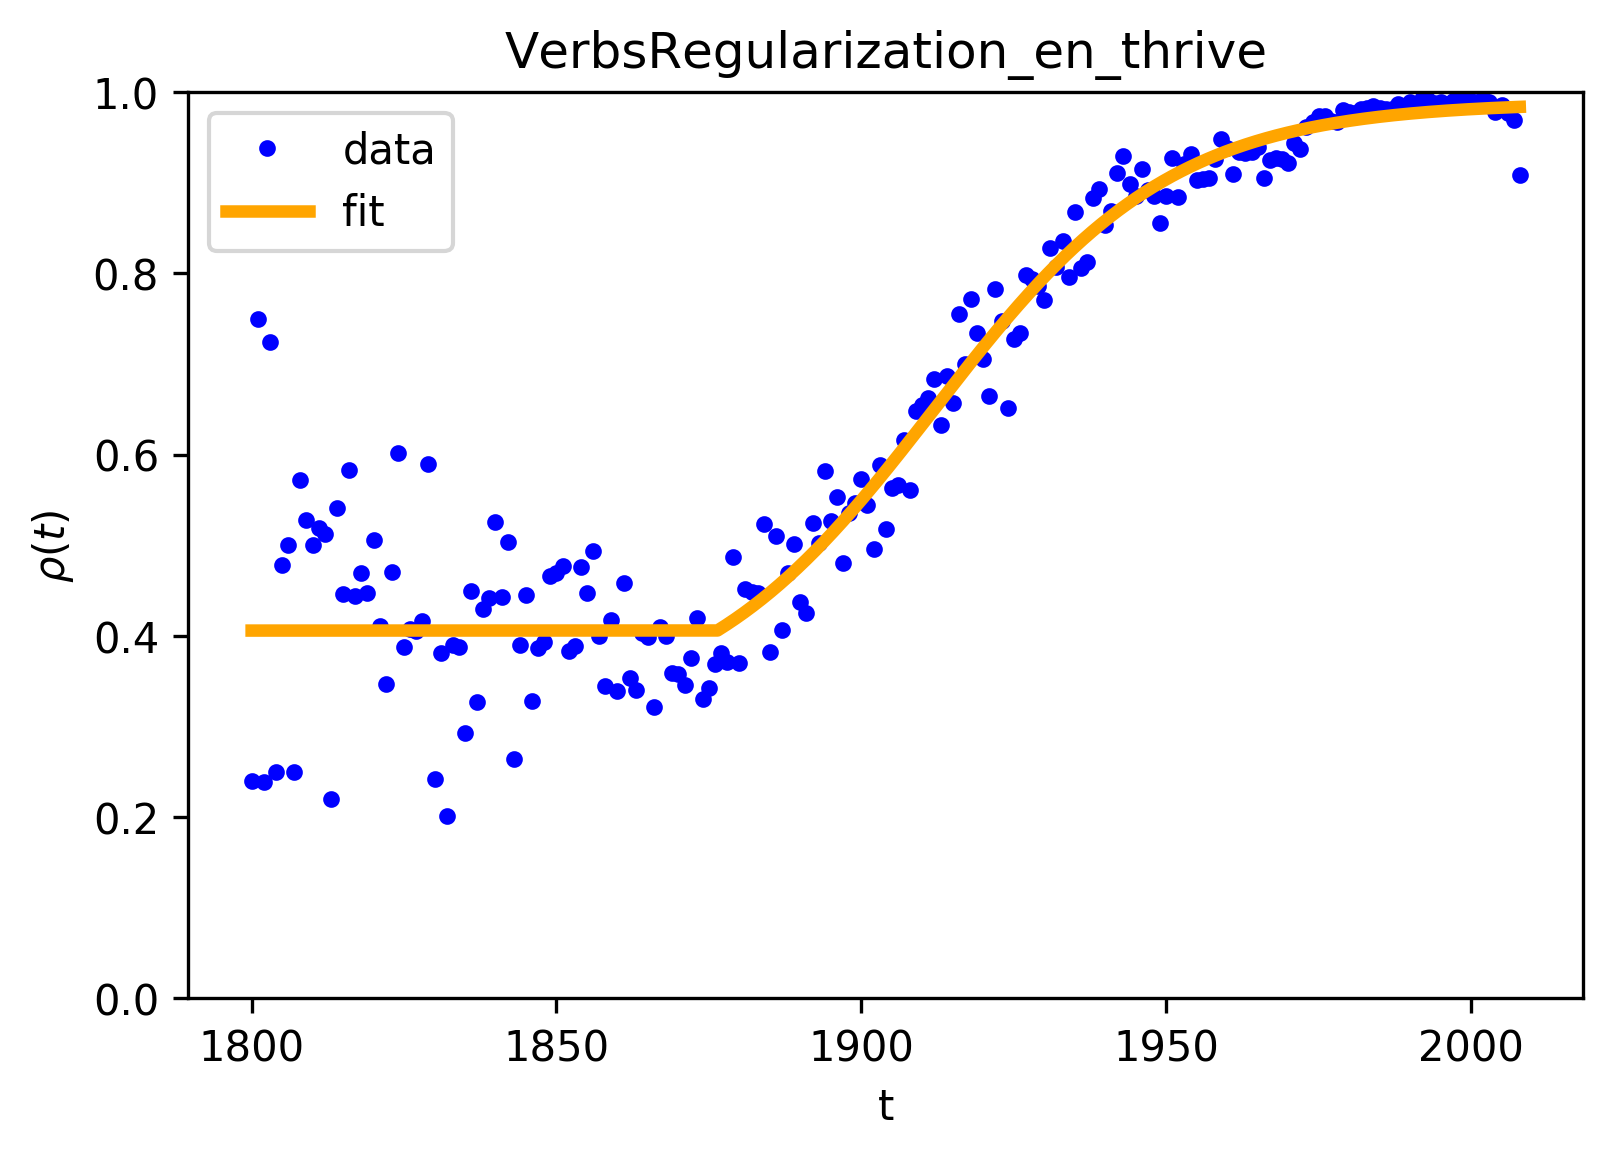

In [5]:
# Plot results
pl.figure(dpi=300)
pl.xlabel('t')
pl.ylabel(r'$\rho(t)$')
pl.title(filename)
pl.plot(t,rho,marker='o',color='blue',lw=0,label='data',ms=3)
pl.plot(t_fit,rho_fit,lw=3,color='orange',label='fit')
pl.legend(loc = 'upper left')
pl.ylim(0,1)
pl.show()